Mujoco Description Playground

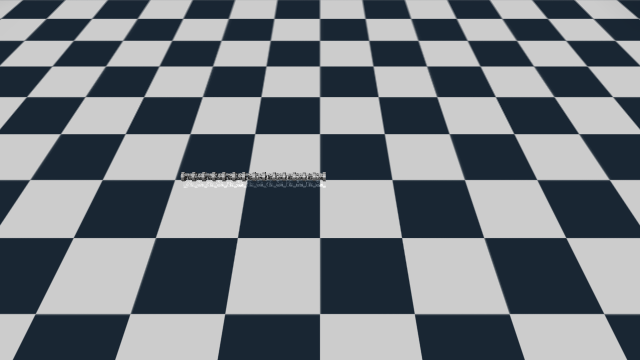

In [5]:
from dm_control import mujoco #dm_control mujoco wrapper

# Access to enums and MuJoCo library functions.
from dm_control.mujoco.wrapper.mjbindings import enums
from dm_control.mujoco.wrapper.mjbindings import mjlib

# Graphics-related
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import PIL.Image #image ploting

# General
import copy
import os
import itertools
from IPython.display import clear_output
import numpy as np

# Inline video helper function
if os.environ.get('COLAB_NOTEBOOK_TEST', False):
  # We skip video generation during tests, as it is quite expensive.
  display_video = lambda *args, **kwargs: None
else:
  def display_video(frames, framerate=30):
    height, width, _ = frames[0].shape
    dpi = 70
    orig_backend = matplotlib.get_backend()
    matplotlib.use('Agg')  # Switch to headless 'Agg' to inhibit figure rendering.
    fig, ax = plt.subplots(1, 1, figsize=(width / dpi, height / dpi), dpi=dpi)
    matplotlib.use(orig_backend)  # Switch back to the original backend.
    ax.set_axis_off()
    ax.set_aspect('equal')
    ax.set_position([0, 0, 1, 1])
    im = ax.imshow(frames[0])
    def update(frame):
      im.set_data(frame)
      return [im]
    interval = 1000/framerate
    anim = animation.FuncAnimation(fig=fig, func=update, frames=frames,
                                   interval=interval, blit=True, repeat=False)
    return HTML(anim.to_html5_video())


physics = mujoco.Physics.from_xml_path("../models/snake_circle_alligned.xml") #the xml file path
pixels = physics.render(height=360, width= 640)

PIL.Image.fromarray(pixels)

Description is successfully imported!
Let's add some rendering options

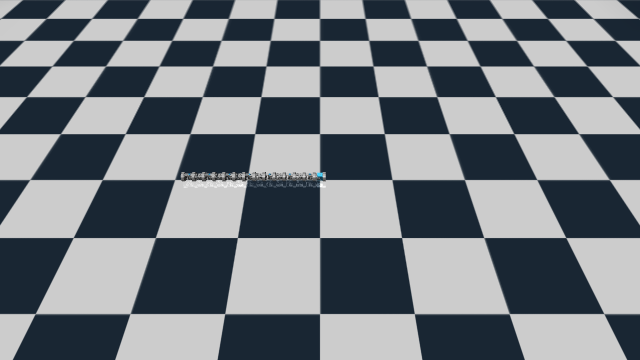

In [6]:
render_option = mujoco.wrapper.core.MjvOption()
render_option.flags[enums.mjtVisFlag.mjVIS_JOINT] = True # Visiable joint option

pixels = physics.render(height=360, width= 640, scene_option=render_option)

PIL.Image.fromarray(pixels)

Video rendering

In [10]:
duration = 10
framerate = 30
k = 0
frames = []

physics.reset()

while physics.data.time < duration:
    if k % 10 == 0:
        motor_ctrl = np.random.randint(low=-3,high=4,size=14)
        physics.data.ctrl = motor_ctrl
        # print(motor_ctrl)
    physics.step()
    k = k + 1

    if len(frames) < physics.data.time * framerate:
        pixels = physics.render(height=360, width= 640, scene_option=render_option)
        frames.append(pixels)

display_video(frames, framerate)

Using interactive viewer set
(Not supported in jupyter environment! Use this script on native)

In [12]:
from dm_control import suite
from dm_control import viewer

env = suite.load(domain_name="humanoid", task_name="stand")
action_spec = env.action_spec()

# Define a uniform random policy.
def random_policy(time_step):
  del time_step  # Unused.
  return np.random.uniform(low=action_spec.minimum,
                           high=action_spec.maximum,
                           size=action_spec.shape)

# Launch the viewer application.
viewer.launch(env, policy=random_policy)